## Data Cleaning

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Data Restaurant Customer
df = pd.read_csv("/content/Restaurant_Reviews.csv")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
# Dataset Attributes Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# Pemeriksaan Missing Values
for i in df.columns:
  print(f"{i} null sum: {df[i].isnull().sum()}")

Review null sum: 0
Liked null sum: 0


In [ ]:
# Deteksi Duplikasi Data
print(df.duplicated().sum())

4


In [ ]:
# Menghapus Duplikasi Data
df = df.drop_duplicates()

# Cek Kembali
print(df.duplicated().sum())

0


In [ ]:
# Menghapus Karakter Tidak Digunakan
df['Review'] = df['Review'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
# Menyimpan Dataset Bersih
df.to_csv("Dataset_Bersih_RestaurantReview.csv", index=False)
print("Dataset Bersih telah disimpan dalam 'Dataset_Bersih_RestaurantReview.csv'")

Dataset Bersih telah disimpan dalam 'Dataset_Bersih_RestaurantReview.csv'


## LAB 1

In [ ]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.9 MB/s eta 0:00:00


In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

# Setup
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    replicate_api_token=api_token
)

In [ ]:
# Load dataset bersih
df = pd.read_csv("Dataset_Bersih_RestaurantReview.csv")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
# Ambil 3 review acak
sample_reviews = df['Review'].dropna().sample(3, random_state=42).tolist()
reviews_text = "\n".join([f"Review {i+1}: {text}" for i, text in enumerate(sample_reviews)])

In [ ]:
# Prompt Dasar
prompt = f"""
Classify these reviews as Positive, Negative, or Mixed:
{reviews_text}
"""
response = llm.invoke(prompt)
print("Response (Basic Prompt):\n", response)

# Refined prompt
refined_prompt = f"""
Classify these restaurant reviews as positive, negative, or mixed,
and tag relevant aspects such as food, service, price, cleanliness:

{reviews_text}
"""
response = llm.invoke(refined_prompt)
print("\nResponse (Refined Prompt):\n", response)

Response (Basic Prompt):
 1. Positive
2. Negative
3. Positive

Explanation:

Review 1: "They were excellent." - This review expresses satisfaction, indicating a positive sentiment.

Review 2: "Your servers suck, wait, correction, our server Heimer sucked." - Initially, the reviewer expresses dissatisfaction with the "servers," but then corrects to specify that only one server, Heimer, was unsatisfactory. This review has a negative sentiment due to the criticism of a specific server.

Review 3: "Will be back again!" - This statement indicates a strong intention to return, which reflects a positive sentiment and overall satisfaction with the experience.

Response (Refined Prompt):
 Review 1: Positive
Aspects: Not specified, assumed overall experience

Review 2: Negative
Aspects: Service (specifically, the server Heimer)

Review 3: Positive
Aspects: Not specified, assumed overall experience or intention to return (indicating satisfaction)


In [ ]:
# Multitask Prompt
multitask_prompt = f"""
Complete this task in 2 steps.
Step 1: Classify each restaurant review as positive, negative, or mixed.
Step 2: Identify relevant aspects: food, service, price, cleanliness.

{reviews_text}
"""
response = llm.invoke(multitask_prompt)
print("Response (Multitask):\n", response)

Response (Multitask):
 **Step 1: Classification**

- Review 1: Positive
- Review 2: Negative (specifically targeting service)
- Review 3: Positive

**Step 2: Aspect Identification**

- Review 1: Positive, no specific aspects mentioned. We can infer it's about the overall experience.
- Review 2: Negative, focusing on 'service', specifically naming server Heimer.
- Review 3: Positive, no specific aspects mentioned. Again, likely referring to the overall experience, implying satisfaction enough to return.

**Summary:**

1. Review 1: Positive, overall experience (no specific aspects identified).
2. Review 2: Negative, poor 'service' (server Heimer).
3. Review 3: Positive, overall experience (implied intention to return).


In [ ]:
# Formatted Prompt
formatted_prompt = f"""
Classify these restaurant reviews as Positive, Negative, or Mixed, and tag relevant aspects.
Use this format:
- Sentiment: [Sentiment]
- Aspects: [List of Aspects]

{reviews_text}
"""
response = llm.invoke(formatted_prompt)
print("Response (Formatted):\n", response)

Response (Formatted):
 - Sentiment: Positive
  - Aspects: Overall experience

- Sentiment: Negative
  - Aspects: Server service, specifically server named Heimer

- Sentiment: Positive
  - Aspects: Likelihood to return (implied satisfaction with overall experience)


In [ ]:
# Ambil 8 review acak dari dataset bersih
sample_reviews = df['Review'].dropna().sample(8, random_state=99).tolist()
reviews_text = "\n".join([f"- {text}" for text in sample_reviews])

In [ ]:
# Prompt Terstruktur
refined_outputformat_prompt = f"""
Analyze the following restaurant reviews and summarize the key takeaways
using this structured format:

Key Feedback:
- [Highlight common opinions or themes]

Customer Sentiment:
- [Summarize the overall tone of the reviews]

Improvement Suggestions:
- [What could be improved according to the reviews]

Reviews:
{reviews_text}
"""

response = llm.invoke(refined_outputformat_prompt)
print("Granite Model Summary Output:\n")
print(response)

Granite Model Summary Output:

Key Feedback:
- The food, particularly the burgers, is criticized for being bland and lacking in flavor despite expectations of spiciness.
- The Penne Vodka is praised for its taste.
- The service is noted to be unprofessional, rude, and lacking in basic courtesy, including a failure to apologize for subpar food or other issues.
- There are concerns about cost-cutting measures, specifically mentioned is the use of only one paper for wrapping sandwiches.

Customer Sentiment:
- The overall tone of the reviews is predominantly negative, with dissatisfaction expressed over food quality, service, and perceived stinginess of the owners.

Improvement Suggestions:
- Enhance the flavor profiles of the dishes, especially the burgers, to meet or exceed customer expectations set by positive reviews and marketing materials.
- Improve the professionalism and customer service skills of the staff, ensuring they treat patrons with respect and courtesy, including acknowled

## LAB 2

In [ ]:
# Ambil 5 Sample Review Secara Acak
sample_reviews = df['Review'].dropna().sample(5, random_state=7).tolist()
reviews_text = "\\n".join([f"- {text}" for text in sample_reviews])

In [ ]:
# PROMPT: CLASSIFICATION
classification_prompt = f"""
Classify these restaurant reviews as positive, negative, or mixed,
and tag relevant aspects: food, service, price, cleanliness.

{reviews_text}
"""

In [ ]:
# PROMPT: SUMMARIZATION
refined_focus_prompt = f"""
Summarize the following restaurant reviews by focusing on:
- Key Feedback (what customers often mention)
- Customer Sentiment (tone of the reviews)
- Suggestions for Improvement (what needs to be improved)

{reviews_text}
"""

In [ ]:
# Default Parameters
parameters = {
    "top_k": 0,
    "top_p": 1.0,
    "max_tokens": 256,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 1.0,
    "stopping_criteria": "length",
    "stopping_sequence": None
}

In [ ]:
# Parameter Sets to Explore
parameter_sets = [
    {"top_k": 5, "top_p": 1.0, "max_tokens": 256, "min_tokens": 0, "repetition_penalty": 1.0},
    {"top_k": 1, "top_p": 0.5, "max_tokens": 10, "min_tokens": 3, "repetition_penalty": 1.5},
    {"top_k": 1, "top_p": 0.5, "max_tokens": 3,  "min_tokens": 1, "repetition_penalty": 1.5},
]

In [ ]:
# === CLASSIFICATION PROMPT ===
for i, param_set in enumerate(parameter_sets):
    print(f"--- Classification | Parameter Set {i+1} ---")
    full_params = parameters.copy()
    full_params.update(param_set)
    response = llm.invoke(classification_prompt, parameters=full_params)
    print(response)
    print("-" * 50)

--- Classification | Parameter Set 1 ---
1. Review: "Awesome service and food."
   - Classification: Positive
   - Relevant Aspects: service, food

2. Review: "At least think to refill my water before I struggle to wave you over for 10 minutes."
   - Classification: Negative
   - Relevant Aspects: service

3. Review: "I paid the bill but did not tip because I felt the server did a terrible job."
   - Classification: Negative
   - Relevant Aspects: service

4. Review: "I didn't know pulled pork could be soooo delicious."
   - Classification: Positive
   - Relevant Aspects: food

5. Review: "By this point, my friends and I had basically figured out this place was a joke and didn't mind making it publicly and loudly known."
   - Classification: Negative (Mixed, leaning towards Negative)
   - Relevant Aspects: Overall experience (implied dissatisfaction with multiple aspects including possibly food, service, and ambiance)

Note: The fifth review is mixed as it expresses a general dissatisf

In [ ]:
# === SUMMARIZATION PROMPT ===
for i, param_set in enumerate(parameter_sets):
    print(f"--- Summarization | Parameter Set {i+1} ---")
    full_params = parameters.copy()
    full_params.update(param_set)
    response = llm.invoke(refined_focus_prompt, parameters=full_params)
    print(response)
    print("-" * 50)

--- Summarization | Parameter Set 1 ---
**Key Feedback:**
- The service and food are generally praised, particularly the pulled pork which is described as exceptionally delicious.
- There's a recurring issue with water refills, where customers have to wait a long time to get their glasses filled.

**Customer Sentiment:**
- Mixed. While the food and service are appreciated by some, others express dissatisfaction due to poor service experiences, specifically regarding water refills.
- Some customers convey frustration, indicating they felt the service was inadequate, leading to a negative dining experience.

**Suggestions for Improvement:**
- Address the water refill issue promptly to enhance customer satisfaction. This could be achieved by ensuring servers check on tables more frequently or implementing a system for automatic refills.
- Improve overall service consistency to prevent customers from feeling neglected. Training staff to be more attentive and responsive to diner needs would

## Visualization

Sentiment count: Counter({'Negative': 499, 'Positive': 485, 'Mixed': 69})


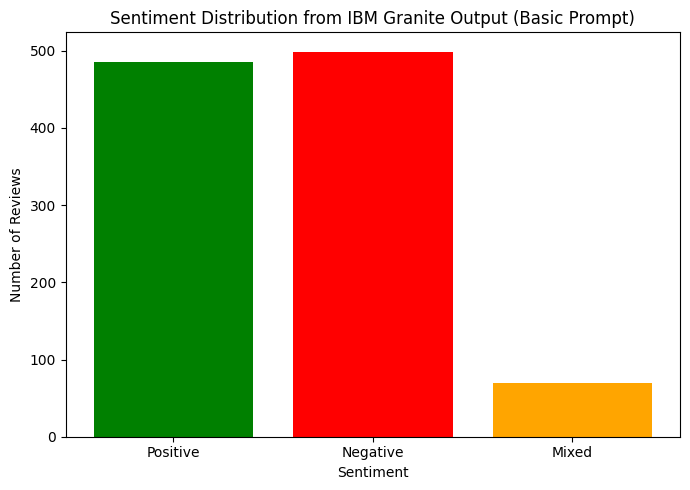

In [ ]:
import pandas as pd
import time
import re
from collections import Counter
import matplotlib.pyplot as plt

# Ambil semua review bersih
all_reviews = df['Review'].dropna().tolist()

# Potong panjang review jika terlalu panjang
max_char = 200
shortened_reviews = [review[:max_char] for review in all_reviews]

# Bagi review menjadi batch
batch_size = 2
batches = [shortened_reviews[i:i+batch_size] for i in range(0, len(shortened_reviews), batch_size)]

# Jalankan ke IBM Granite via Replicate
sentiment_results = []

for batch in batches:
    try:
        review_text = "\n".join([f"Review {i+1}: {text}" for i, text in enumerate(batch)])
        prompt = f"Classify these reviews as Positive, Negative, or Mixed:\n{review_text}"

        # Invoke model
        response = llm.invoke(prompt)
        sentiment_results.append(response)

        time.sleep(2)
    except Exception as e:
        print("Batch failed:", e)
        sentiment_results.append("ERROR")

# Gabungkan semua hasil
combined_output = "\n".join(sentiment_results)

# Ekstrak hasil sentimen dari output
sentiments = re.findall(r"\b(Positive|Negative|Mixed)\b", combined_output)
sentiment_count = Counter(sentiments)
print("Sentiment count:", sentiment_count)

# Visualisasi
labels = list(sentiment_count.keys())
values = list(sentiment_count.values())

plt.figure(figsize=(7, 5))
plt.bar(labels, values, color=['green', 'red', 'orange'])
plt.title("Sentiment Distribution from IBM Granite Output (Basic Prompt)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()